Dependencies

In [100]:
from __future__ import division
from itertools import *

In [1]:
import os
falange = r"/run/user/1000/gvfs/smb-share:server=falange,share=homes"
#os.listdir(falange)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

```$ ipcluster start -n 4
```

In [3]:
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.colors import ListedColormap
sns.set_palette("Spectral")
current_palette = sns.color_palette()
my_cmap = ListedColormap((["#000000"]+current_palette.as_hex())[::-1])

In [9]:
from ipyparallel import Client
rc = Client(profile="parallel")

In [20]:
rc.shutdown()

In [10]:
dv = rc[:]

In [11]:
dv

<DirectView [0, 1, 2, 3, 4]>

In [12]:
rc.ids

[0, 1, 2, 3, 4]

In [13]:
with dv.sync_imports():
    import numpy

importing numpy on engine(s)


# Mandelbrot

In [9]:
@dv.parallel(block = True)
def mandel3(x, y, max_iters=50):
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if z.real*z.real + z.imag*z.imag >= 4:
            return i
    return max_iters #could return X,Y, max_iters to try block=False

In [29]:
#zooming
def zoombrot(zooms, n=500, target = [-0.748202,-0.161082]):
    for zoom in range(zooms):
        
        window = 1./10**zoom
        x = np.linspace(target[0]-1*window,target[0]+1*window,n)
        y = np.linspace(target[1]-1*window,target[1]+1*window,n)
        X, Y = np.meshgrid(x, y)
        im3 = numpy.reshape(mandel3.map(X.ravel(), Y.ravel()),  (len(y), len(x)))
        
        fig, axes = plt.subplots(1, 1)
        axes.grid(False)
        
        values = np.unique(im3.ravel())
        sns.set_palette("Spectral",len(values)-1)
        current_palette = sns.color_palette()
        my_cmap = ListedColormap((["#000000"]+current_palette.as_hex())[::-1])

        
        im = axes.imshow(im3, cmap=my_cmap,extent=[x[0],x[-1],y[0],y[-1]])
        #im = axes.imshow(ship, cmap=my_cmap)
        
        #colors = [ im.cmap(im.norm(value)) for value in values]
        
        #patches = [ mpatches.Patch(color=colors[i], label="{l}".format(l=values[i]) ) for i in range(len(values)) ]
        #plt.legend(handles=patches, loc='best', title="Iterations", frameon=True, fancybox=True)
        plt.title('Mandelbrot w/ %s Points'%(len(im3)**2))
        plt.show()

<IPython.core.display.Javascript object>


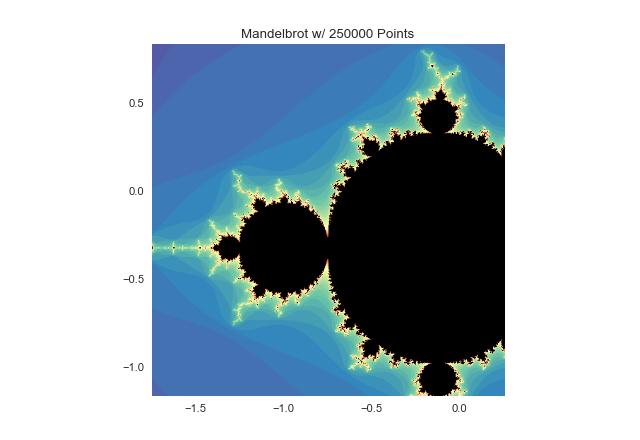

<IPython.core.display.Javascript object>


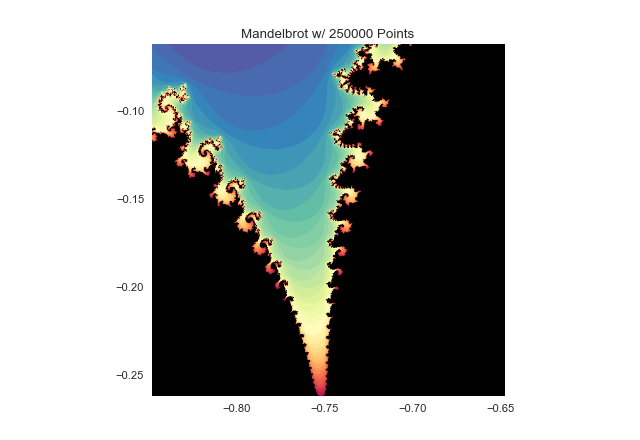

<IPython.core.display.Javascript object>


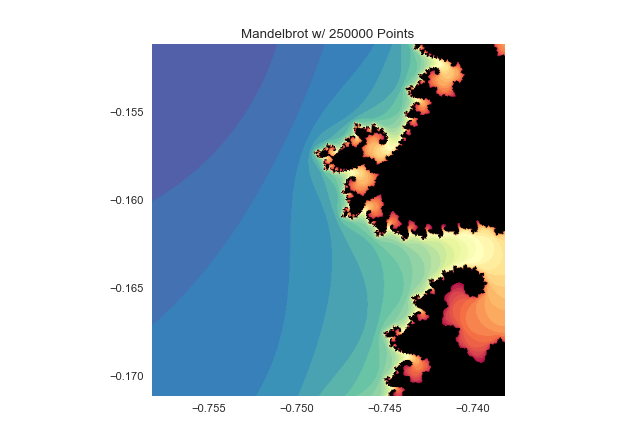

<IPython.core.display.Javascript object>


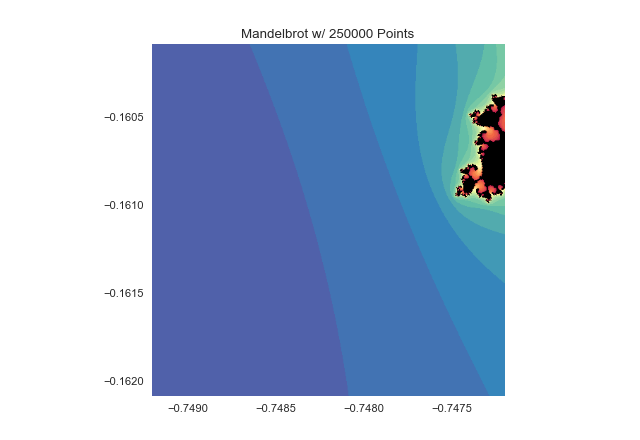

<IPython.core.display.Javascript object>


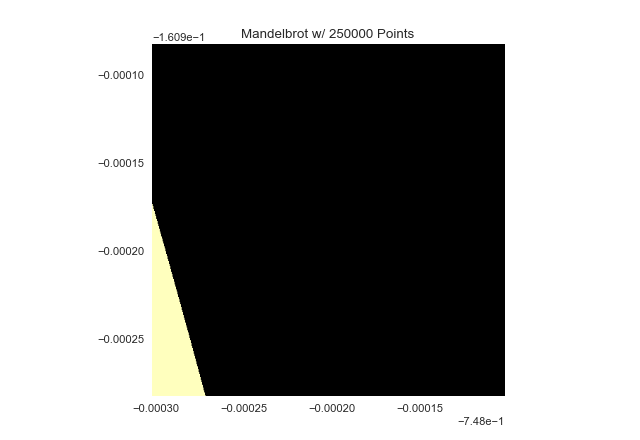

In [30]:
zoombrot(5)

# Burning Ship

In [15]:
@dv.parallel(block=True)
def burning_ship(x,y,max_iters=100):
    c = complex(x,y)
    z = 0.0j
    for i in range(max_iters):
        z = (abs(z.real)+abs(z.imag)*1j)**2 + c
        if z.real*z.real + z.imag*z.imag >= 4:
            return i
    return max_iters #could return X,Y, max_iters to try block=False        

In [219]:
#x = np.arange(-2, 1, 0.0005)
#y = np.arange(-1, 1, 0.0005)
n = 5000
n = 10000
#n = 500
y = np.linspace(-0.015,0.0025,1/3 * n)
x = np.linspace(-1.87,-1.83,n)
xstart = -1.871
x = np.linspace(xstart,xstart+(y[-1]-y[0])*3,n)
X, Y = np.meshgrid(x, y)

/home/durand/.local/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


In [220]:
%%time
shipwide = numpy.reshape(burning_ship.map(X.ravel(), Y.ravel()),  (len(y), len(x)))

CPU times: user 4.15 s, sys: 1.36 s, total: 5.51 s
Wall time: 4min 35s


In [221]:
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return izip(a, b)

def colour_grad(cs,n):
    grad = []
    for c1,c2 in pairwise(cs):
        for step in np.linspace(0,1,n/(len(cs)-1),endpoint=False):
            grad += [tuple(c1*step + c2*(1-step))]
    return grad    

In [222]:
sns.set_palette(['orange','white'])
sns.set_palette(colour_grad(np.array(sns.color_palette()),len(np.unique(shipwide))))

/home/durand/.local/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


In [223]:
#sns.set_palette("YlOrRd_d",len(np.unique(shipwide)))
sns.set_palette("OrRd",len(np.unique(shipwide)))
current_palette = sns.color_palette()
#my_cmap = ListedColormap((["#000000"]+current_palette.as_hex()[::-1])[::-1])
#my_cmap = ListedColormap(current_palette.as_hex()[::-1])
my_cmap = ListedColormap(current_palette.as_hex())

<IPython.core.display.Javascript object>


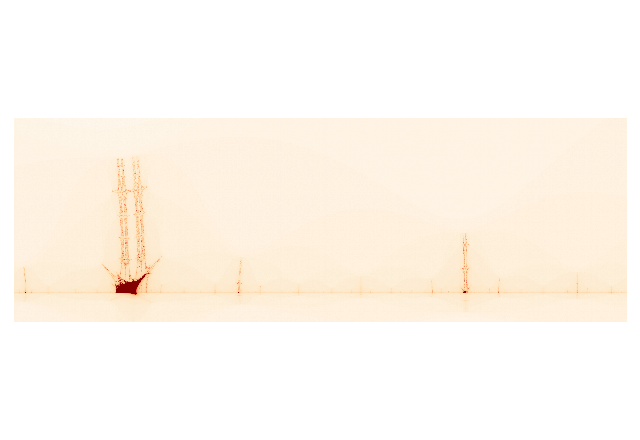

In [224]:
fig, axes = plt.subplots(1, 1)
axes.grid(False)
im = axes.imshow(shipwide, cmap=my_cmap,extent=[x[0],x[-1],y[-1],y[0]],interpolation='bessel')
axes.set_xticks([])
axes.set_yticks([])
fig.tight_layout()
fig.savefig('burningshipwide.png', format='png', dpi=1200,bbox_inches='tight')

#plt.show()

# Other

In [143]:
%%time
im3 = numpy.reshape(mandel3.map(X.ravel(), Y.ravel()),  (len(y), len(x)))

Wall time: 1.06 s


<IPython.core.display.Javascript object>


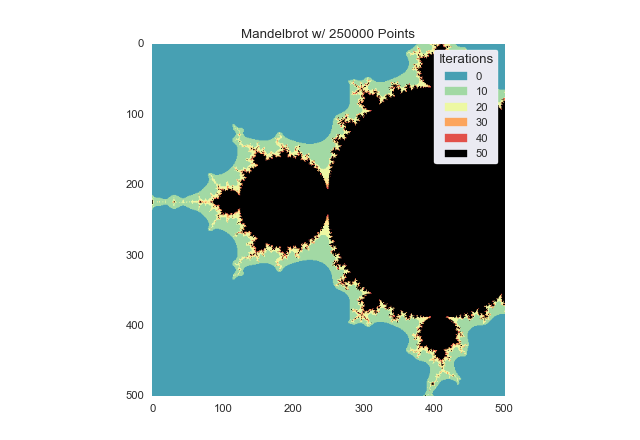

In [144]:
fig, axes = plt.subplots(1, 1)
axes.grid(False)
# im = axes.imshow(im3, cmap=my_cmap)
im = axes.imshow(ship, cmap=my_cmap)

axes.set_xticks([])
axes.set_yticks([])

if legending:
    values = np.unique(im)
    # get the colors of the values, according to the 
    # colormap used by imshow
    colors = [ im.cmap(im.norm(value)) for value in values]
    # create a patch (proxy artist) for every color 
    patches = [ mpatches.Patch(color=colors[i*10], label="{l}".format(l=values[i*10]) ) for i in range(len(values)/10 +1) ]
    # put those patched as legend-handles into the legend
    plt.legend(handles=patches, loc='best', title="Iterations", frameon=True, fancybox=True)
plt.title('Mandelbrot w/ %s Points'%(len(im3)**2))
fig.
plt.show()

## Magic Methods

In [46]:
%%time
%px a = numpy.random.random(1000)
print np.array(dv['a']).mean()

0.503052957593
Wall time: 115 ms


Parallel Magic Funcs

[stdout:0] Wall time: 44 ms
[stdout:1] Wall time: 94 ms
[stdout:2] Wall time: 76 ms
[stdout:3] Wall time: 60 ms
[stdout:4] Wall time: 69 ms
[stdout:5] Wall time: 62 ms
[stdout:6] Wall time: 62 ms
[stdout:7] Wall time: 47 ms
[stdout:8] Wall time: 78 ms
[stdout:9] Wall time: 62 ms


[output:0]

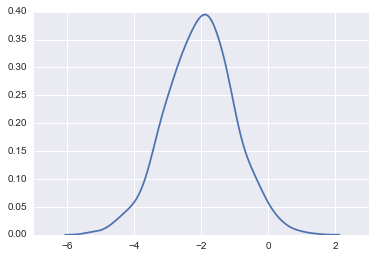

[output:1]

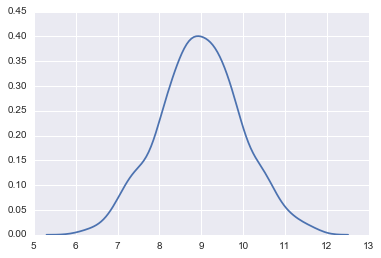

[output:2]

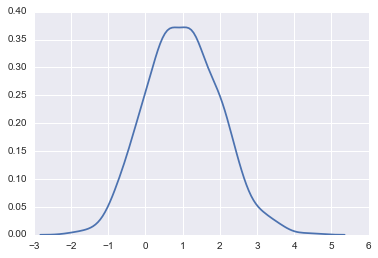

[output:3]

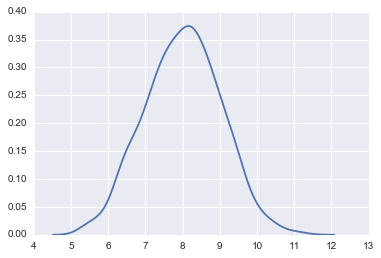

[output:4]

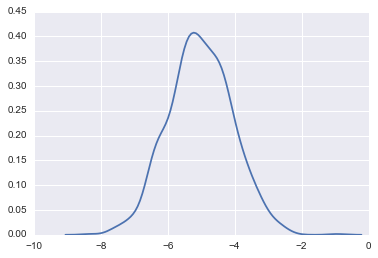

[output:5]

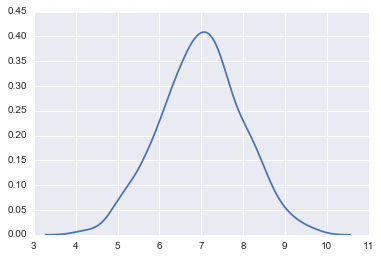

[output:6]

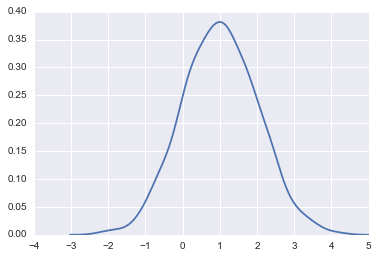

[output:7]

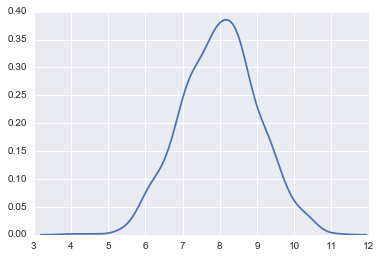

[output:8]

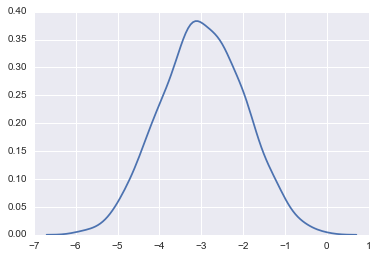

[output:9]

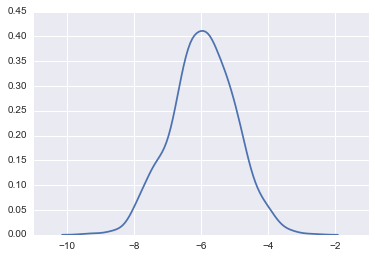

In [44]:
%%px 
%%time
%matplotlib inline
import seaborn as sns
x = numpy.random.normal(numpy.random.randint(-10, 10), 1, 1000)
sns.kdeplot(x);